Mert Ekici 26772 ekicimert@sabanciuniv.edu

# Agricultural Robotics Problem

## Algorithms

### Naive Solution 

In [367]:
def removeWeedNaive(map,i,j):
    path = []
    if i == len(map)-1 and j == len(map[0])-1:
        path.append([i,j])
        return map[i][j], path
    if (i > len(map)-1) or (j > len(map[0])-1):
        return 0, path
    else:
        down,pdown = removeWeedNaive(map,i+1,j)
        right,pright = removeWeedNaive(map,i,j+1)
        if (down<right):
            pright.append([i,j])
            if (i==0 and j==0):
                pright.reverse()
            return map[i][j] + right, pright
        elif (down>=right):
            pdown.append([i,j])
            if (i==0 and j==0):
                pdown.reverse()
            return map[i][j] + down, pdown
   


In [368]:
farm = [
    [1 , 0 , 1 , 0 , 0 , 0],
    [0 , 1 , 0 , 1 , 0 , 0],
    [0 , 1 , 1 , 0 , 0 , 0],
    [0 , 0 , 0 , 0 , 1 , 0],
    [1 , 0 , 1 , 0 , 0 , 1],   
]

In [369]:
a,b = removeWeedNaive(farm,0,0)
print(a)
print(b)

6
[[0, 0], [1, 0], [1, 1], [2, 1], [2, 2], [3, 2], [4, 2], [4, 3], [4, 4], [4, 5]]


### Memoization Solution (DP Recursive)

In [370]:
def removeWeed(f,i,j,table):
    if (i==0 or j==0):
        return 0
    elif (table[i][j] != -1):
        return table[i][j]
    table[i][j] = max(removeWeed(f,i,j-1,table),removeWeed(f,i-1,j,table)) + f[i-1][j-1]
    return table[i][j]

   
def removeWeedDP(f):
    n,m = len(f), len(f[0])
    table = [[-1]*(m+1) for c in range(n+1)]
    wNum = removeWeed(f,n,m,table)
    path = []
    if(n>0 and m>0):
        path.append([n-1,m-1])
    while (n > 1) or (m > 1):
        if(table[n-1][m]>table[n][m-1]):
            n=n-1
        else:
            m=m-1
        path.append([n-1,m-1])
    path.reverse()
    return wNum,path,table
            
            

    
    

In [371]:
wnum, path, t  = removeWeedDP(farm)
print(wnum)
print(path)

for i in range(len(t)):
    print(t[i])

6
[[0, 0], [1, 0], [1, 1], [2, 1], [2, 2], [3, 2], [4, 2], [4, 3], [4, 4], [4, 5]]
[-1, -1, -1, -1, -1, -1, -1]
[-1, 1, 1, 2, 2, 2, 2]
[-1, 1, 2, 2, 3, 3, 3]
[-1, 1, 3, 4, 4, 4, 4]
[-1, 1, 3, 4, 4, 5, 5]
[-1, 2, 3, 5, 5, 5, 6]


## Experimental Evaluations and Testing

### Random Map Generator

In [372]:
import random

In [373]:
# n is row size and m is column size, if not given they are selected randomly
def randMap(n=random.randint(0,100),m=random.randint(0,100)):
    farm = []
    for i in range(n):
        row = []
        for j in range(m):
            row.append(random.randint(0,1))
        farm.append(row)
    return farm

### Functional Testing

Testing a program for its correctness.

Create a benchmark suite of at least 5 instances to test the correctness of your Python program: take into account the functional testing methods (e.g., white box and black box testing) while constructing the instances, and test your programs with these instances.

#### Black Box

Try extremes (not systematic):
- empty map,
- one block,
- all of them empty,
- all of them filled,
- linear (1 row, n columns)
- random

In [374]:
#Black Box Test Suite

BBf1 = [[]] #Empty
BBf2 = [[1]] #One Block
BBf3 =  [
    [0 , 0 , 0 , 0 , 0 , 0],
    [0 , 0 , 0 , 0 , 0 , 0],
    [0 , 0 , 0 , 0 , 0 , 0],
    [0 , 0 , 0 , 0 , 0 , 0],
    [0 , 0 , 0 , 0 , 0 , 0],   
] #All Empty

BBf4 =  [
    [1 , 1 , 1 , 1 , 1 , 1],
    [1 , 1 , 1 , 1 , 1 , 1],
    [1 , 1 , 1 , 1 , 1 , 1],
    [1 , 1 , 1 , 1 , 1 , 1],
    [1 , 1 , 1 , 1 , 1 , 1],
] #All Filled

BBf5 = [[1,0,1,1,1,0,1,0]] #Linear

BBf6 = randMap() #Random

BlackBoxTestSuite = [BBf1,BBf2,BBf3,BBf4,BBf5,BBf6]

In [375]:
for i in range(len(BBf6)):
    print(BBf6[i])

[0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1]
[0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1]
[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]
[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1]
[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1]
[0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0]
[1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1

In [376]:
bblines = []
for i in range(len(BlackBoxTestSuite)):
    wnum, path, t  = removeWeedDP(BlackBoxTestSuite[i])
    print(wnum)
    print(path)
    bblines.append("***Test#"+str(i+1)+"***")
    bblines.append("map:")
    for j in range(len(BlackBoxTestSuite[i])):
        bblines.append(str(BlackBoxTestSuite[i][j]))
    bblines.append("max blocks removed: "+str(wnum))
    bblines.append("path with max removal" + str(path))
    bblines.append(" ")
    

0
[]
1
[[0, 0]]
0
[[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5]]
10
[[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5]]
5
[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7]]
73
[[0, 0], [1, 0], [1, 1], [1, 2], [2, 2], [3, 2], [4, 2], [4, 3], [4, 4], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [6, 8], [7, 8], [8, 8], [8, 9], [9, 9], [10, 9], [10, 10], [11, 10], [12, 10], [13, 10], [13, 11], [13, 12], [13, 13], [13, 14], [14, 14], [15, 14], [16, 14], [17, 14], [17, 15], [18, 15], [19, 15], [20, 15], [21, 15], [22, 15], [23, 15], [23, 16], [23, 17], [23, 18], [24, 18], [24, 19], [25, 19], [26, 19], [27, 19], [27, 20], [27, 21], [28, 21], [28, 22], [29, 22], [30, 22], [30, 23], [30, 24], [30, 25], [31, 25], [31, 26], [32, 26], [32, 27], [32, 28], [32, 29], [33, 29], [34, 29], [34, 30], [34, 31], [35, 31], [36, 31], [37, 31], [38, 31], [38, 32], [38, 33], [39, 33], [40, 33], [40, 34], [41, 34], [42, 34], [42, 35], [43, 

In [377]:
with open('blackbox.txt', 'w') as f:
    for line in bblines:
        f.write(line)
        f.write('\n')

They are all correct!

#### White Box

Statement coverage (try test cases that will exercise every statement)

Decision coverage (try test cases that will exercise every decision)

Path coverage (try test cases that will exercise every path)

The test suite created for Black Box testing is analyzed based on statement coverage.

Empty<br />
BBf1 = [[]] 

One Block<br />
BBf2 = [[1]] 

All Empty<br />
BBf3 =  [<br />
    [0 , 0 , 0 , 0 , 0 , 0],<br />
    [0 , 0 , 0 , 0 , 0 , 0],<br />
    [0 , 0 , 0 , 0 , 0 , 0],<br />
    [0 , 0 , 0 , 0 , 0 , 0],<br />
    [0 , 0 , 0 , 0 , 0 , 0]<br />,   
] 

All Filled<br />
BBf4 =  [<br />
    [1 , 1 , 1 , 1 , 1 , 1],<br />
    [1 , 1 , 1 , 1 , 1 , 1],<br />
    [1 , 1 , 1 , 1 , 1 , 1],<br />
    [1 , 1 , 1 , 1 , 1 , 1],<br />
    [1 , 1 , 1 , 1 , 1 , 1]<br />,
] 

Linear<br />
BBf5 = [[1,0,1,1,1,0,1,0]] 

Random<br />
BBf6

Results:
- BBf1: enters if in removeWeed, passes if and while parts in removeWeedDP
- BBf2: enters both if and elif conditions in removeWeed, enters if but passes while in removeWeedDP
- BBf3: covers all statements
- BBf4: covers all statements
- BBf5: enters both if and elif conditions in removeWeed, enters the outside if but in while it only enters the else part in removeWeedDP
- BBf6: covers all statements

This test suite has 100% Statement Coverage!

### Performance Testing

Testing a program to find out the performance in practice.

Create a benchmark suite to test the performance of your Python programs: construct instances of different sizes (e.g., relative to the number of levels), evaluate the performance of your program in terms of computation times, and plot the results within a graph.

In [378]:
import time
from time import process_time
import matplotlib.pyplot as plt
import numpy as np

In [379]:
PerformanceTestSuite = []
for i in range(400):
    PerformanceTestSuite.append(randMap(i+1,i+1))    

In [380]:
PerformanceTimes = []
count = 1
for i in PerformanceTestSuite:
    start = process_time() 
    removeWeedDP(i)
    end = process_time()
    ti = end - start 
    PerformanceTimes.append([(count)**2,ti])
    count+=1

In [381]:
PerformanceTimesArr = np.array(PerformanceTimes)

In [382]:
plt.style.use('default')

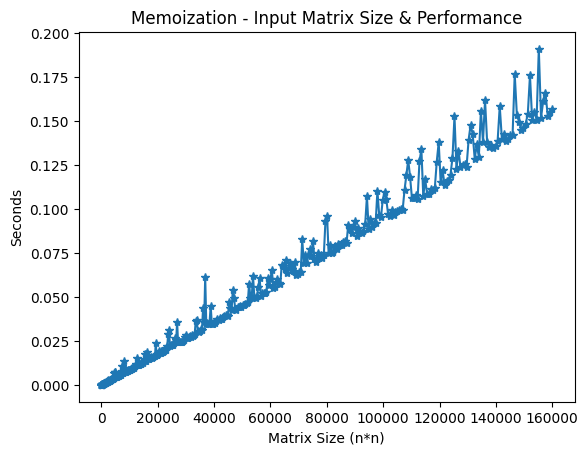

In [383]:
plt.title('Memoization - Input Matrix Size & Performance')
plt.xlabel('Matrix Size (n*n)')
plt.ylabel('Seconds')
plt.plot(PerformanceTimesArr[:,0], PerformanceTimesArr[:,1], '*-')
#plt.xticks(worstcase_sizes)
#plt.plot(labels, memoization_worstcase, '*-')
plt.show()

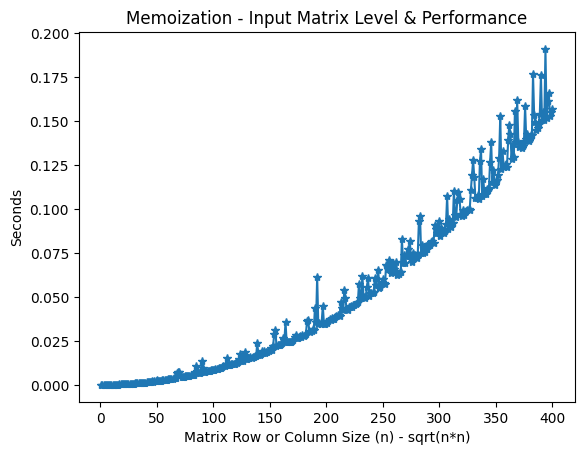

In [384]:
plt.title('Memoization - Input Matrix Level & Performance')
plt.xlabel('Matrix Row or Column Size (n) - sqrt(n*n)')
plt.ylabel('Seconds')
plt.plot(np.sqrt(PerformanceTimesArr[:,0]), PerformanceTimesArr[:,1], '*-')
#plt.xticks(worstcase_sizes)
#plt.plot(labels, memoization_worstcase, '*-')
plt.show()

#### Central Limit Theorem

Collect running time data: How reliable is a single measurement?

Let us try N different farm maps of n*m size.

By using CLT, we can measure the confidence interval of mean running time of all possible runs for a given input size.

In [385]:
import math

In [386]:
PerformanceTestSuiteSingle = []
for i in range(50,400,50):
    PerformanceTestSuiteSingle.append([i,randMap(i,i)])   

In [387]:
PerformanceTimesSingle = []

for i in PerformanceTestSuiteSingle:
    start = process_time() 
    removeWeedDP(i[1])
    end = process_time()
    ti = end - start 
    PerformanceTimesSingle.append([(i[0])**2,ti])

In [388]:
PerformanceTimesSingleArr = np.array(PerformanceTimesSingle)
print(PerformanceTimesSingleArr)

[[2.5000000e+03 4.1081260e-03]
 [1.0000000e+04 1.1538366e-02]
 [2.2500000e+04 1.9970216e-02]
 [4.0000000e+04 3.4768390e-02]
 [6.2500000e+04 5.6409376e-02]
 [9.0000000e+04 8.3404041e-02]
 [1.2250000e+05 1.5937323e-01]]


In [389]:
N=20
PerformanceTestSuiteResultsCLT = []
CLTstd = []
for i in range(50,400,50):
  times = []
  for j in range(N):
    field = randMap(i,i)
    start = process_time() 
    removeWeedDP(field)
    end = process_time()
    ti = end - start 
    times.append(ti)
  PerformanceTestSuiteResultsCLT.append(np.mean(np.array(times)))
  CLTstd.append(np.std(np.array(times)))

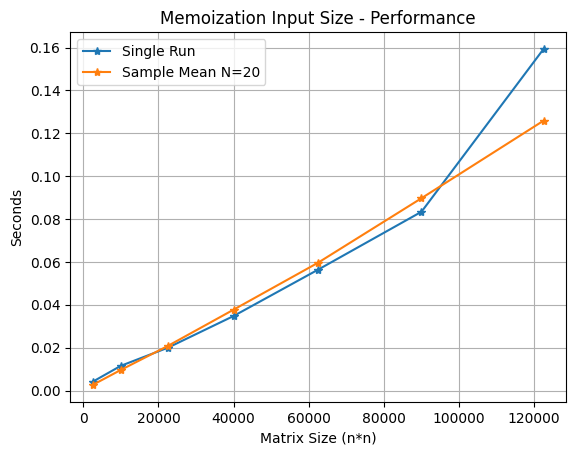

In [390]:
plt.title('Memoization Input Size - Performance')
plt.xlabel('Matrix Size (n*n)')
plt.ylabel('Seconds')
plt.plot(PerformanceTimesSingleArr[:,0], PerformanceTimesSingleArr[:,1], '*-', label='Single Run')
plt.plot(PerformanceTimesSingleArr[:,0], PerformanceTestSuiteResultsCLT, '*-', label='Sample Mean N=20')
#plt.xticks(worstcase_sizes)
#plt.plot(labels, memoization_worstcase, '*-')
plt.grid()
plt.legend()
plt.show()

In [391]:
CLTstd = np.array(CLTstd)
PerformanceTestSuiteResultsCLT = np.array(PerformanceTestSuiteResultsCLT)
CLTsm = np.sqrt(CLTstd)/N

ts = [[90, 1.729],[95,2.093]]
levels = [50,100,150,200,250,300,350]
CLTlines = []
for i in range(len(levels)):
  for j in ts:
    upper = PerformanceTestSuiteResultsCLT[i] + j[1] * CLTsm[i] 
    lower = PerformanceTestSuiteResultsCLT[i] - j[1] * CLTsm[i] 
    line = "Confidence interval of average run time for " + str(levels[i]) + " x "+str(levels[i]) +" matrix ("+str(j[0])+"% confidence interval): " + str(upper) + " - "+str(lower) 
    if (j[0] == 95):
      line = line + '\n'
    print(line)
    CLTlines.append(line)

Confidence interval of average run time for 50 x 50 matrix (90% confidence interval): 0.005020798098118272 - 0.00020643810189843303
Confidence interval of average run time for 50 x 50 matrix (95% confidence interval): 0.005527572834562466 - -0.0003003366345457601

Confidence interval of average run time for 100 x 100 matrix (90% confidence interval): 0.013580019434028187 - 0.005675508665978625
Confidence interval of average run time for 100 x 100 matrix (95% confidence interval): 0.014412073199086037 - 0.004843454900920776

Confidence interval of average run time for 150 x 150 matrix (90% confidence interval): 0.024302631708626423 - 0.01730442669139168
Confidence interval of average run time for 150 x 150 matrix (95% confidence interval): 0.025039284868335343 - 0.01656777353168276

Confidence interval of average run time for 200 x 200 matrix (90% confidence interval): 0.043098524269090915 - 0.03236999663088082
Confidence interval of average run time for 200 x 200 matrix (95% confidence

In [392]:
with open('CLT.txt', 'w') as f:
    for line in CLTlines:
        f.write(line)
        f.write('\n')